In [ ]:
!pip install liac-arff

  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=17c6b9fb73b2f18874943bb449680605f2bfdfb67cb96e18a43bb983374967c2
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


# **Data pre-processing**


In [ ]:
from scipy.io import arff
import pandas as pd

train_data, meta_train = arff.loadarff('/content/UWaveGestureLibraryAll_TRAIN.arff')
test_data, meta_test = arff.loadarff('/content/UWaveGestureLibraryAll_TEST.arff')

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

print("Train Data:")
print(train_df.head())
print("\nTest Data:")
print(test_df.head())

Train Data:
       att1      att2      att3      att4      att5      att6      att7  \
0 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502 -0.312502   
1  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721  1.629721   
2  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410  0.665410   
3  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887  0.164887   
4  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493  1.272493   

       att8      att9     att10  ...    att937    att938    att939    att940  \
0 -0.312502 -0.312502 -0.312502  ...  0.503002  0.492524  0.482045  0.463662   
1  1.629721  1.629721  1.629721  ... -0.424252 -0.424252 -0.424414 -0.426015   
2  0.665410  0.665410  0.665410  ... -0.856895 -0.856895 -0.856895 -0.856895   
3  0.164887  0.164887  0.164887  ... -0.131015 -0.286569  0.051284  0.389136   
4  1.272493  1.272493  1.272493  ...  1.819330  1.741195  1.624052  1.506909   

     att941    att942    att943    att944    att945  tar

In [ ]:
print("Number of columns in training data:", train_df.shape[1])
print("Number of columns in testing data:", test_df.shape[1])

Number of columns in training data: 946
Number of columns in testing data: 946


In [ ]:
train_classes = train_df.iloc[:, -1].unique()
test_classes = test_df.iloc[:, -1].unique()

print("Classes in training data:", train_classes)
print("Classes in testing data:", test_classes)

print("\nClass distribution in training data:")
print(train_df.iloc[:, -1].value_counts())

print("\nClass distribution in testing data:")
print(test_df.iloc[:, -1].value_counts())


Classes in training data: [b'6' b'5' b'3' b'4' b'8' b'7' b'1' b'2']
Classes in testing data: [b'5' b'1' b'4' b'6' b'2' b'3' b'8' b'7']

Class distribution in training data:
target
b'5'    127
b'1'    122
b'7'    112
b'6'    111
b'4'    110
b'2'    108
b'3'    106
b'8'    100
Name: count, dtype: int64

Class distribution in testing data:
target
b'8'    460
b'3'    454
b'2'    452
b'4'    450
b'6'    449
b'7'    447
b'1'    437
b'5'    433
Name: count, dtype: int64


In [ ]:
print("Missing values in train data:\n", train_df.isnull().sum())
print("Missing values in test data:\n", test_df.isnull().sum())


Missing values in train data:
 att1      0
att2      0
att3      0
att4      0
att5      0
         ..
att942    0
att943    0
att944    0
att945    0
target    0
Length: 946, dtype: int64
Missing values in test data:
 att1      0
att2      0
att3      0
att4      0
att5      0
         ..
att942    0
att943    0
att944    0
att945    0
target    0
Length: 946, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
X_train_scaled['target'] = y_train.values
X_test_scaled['target'] = y_test.values

In [ ]:
print(y_train_final.dtype)
print(y_train_final.head())

object
0    b'6'
1    b'5'
2    b'5'
3    b'3'
4    b'4'
Name: target, dtype: object


In [ ]:
y_train_final = y_train_final.apply(lambda x: int(x.decode('utf-8')))
y_test_final = y_test_final.apply(lambda x: int(x.decode('utf-8')))

print(y_train_final.dtype)
print(y_train_final.head())

int64
0    6
1    5
2    5
3    3
4    4
Name: target, dtype: int64


In [ ]:
print(X_train_final.dtypes)
print(X_test_final.dtypes)

X_train_final = X_train_final.apply(pd.to_numeric, errors='coerce')
X_test_final = X_test_final.apply(pd.to_numeric, errors='coerce')


att1      float64
att2      float64
att3      float64
att4      float64
att5      float64
           ...   
att941    float64
att942    float64
att943    float64
att944    float64
att945    float64
Length: 945, dtype: object
att1      float64
att2      float64
att3      float64
att4      float64
att5      float64
           ...   
att941    float64
att942    float64
att943    float64
att944    float64
att945    float64
Length: 945, dtype: object


In [ ]:
y_train_final = y_train.apply(lambda x: int(x.decode('utf-8')))
y_test_final = y_test.apply(lambda x: int(x.decode('utf-8')))

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_final)

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test_final, y_pred)
report = classification_report(y_test_final, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)


Accuracy: 0.9494695700725851

Classification Report:
               precision    recall  f1-score   support

           1       0.97      0.98      0.98       437
           2       0.98      0.99      0.99       452
           3       0.95      0.96      0.95       454
           4       0.95      0.87      0.91       450
           5       0.88      0.95      0.91       433
           6       0.93      0.88      0.90       449
           7       0.99      0.98      0.98       447
           8       0.95      0.98      0.97       460

    accuracy                           0.95      3582
   macro avg       0.95      0.95      0.95      3582
weighted avg       0.95      0.95      0.95      3582



Based on our classifiation report we get good performance metrics

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
y_train_dbscan = dbscan.fit_predict(X_train_pca)


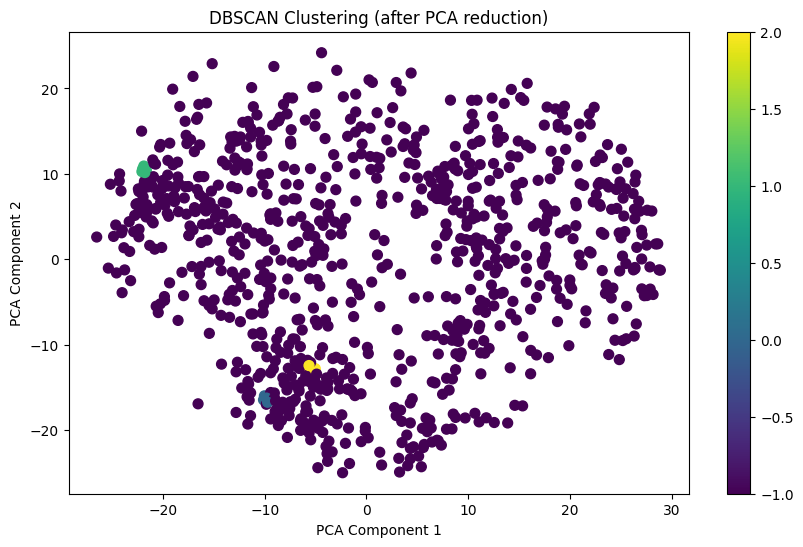

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_dbscan, cmap='viridis', s=50)
plt.title("DBSCAN Clustering (after PCA reduction)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

It is clustering based on PCA value of component 1 and compotent 2.   

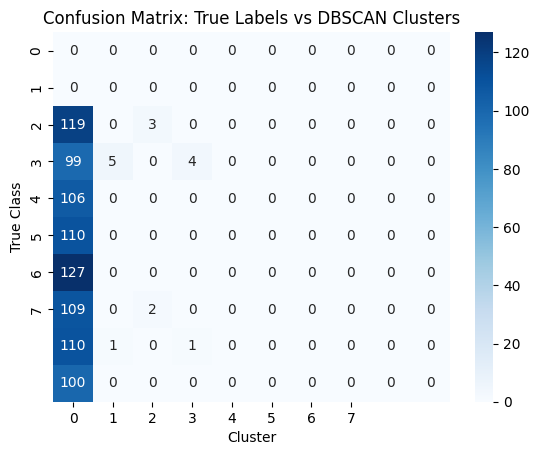

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix_dbscan = confusion_matrix(y_train_final, y_train_dbscan)
sns.heatmap(conf_matrix_dbscan, annot=True, fmt='d', cmap="Blues", xticklabels=[str(i) for i in range(num_clusters)], yticklabels=[str(i) for i in range(num_clusters)])
plt.title("Confusion Matrix: True Labels vs DBSCAN Clusters")
plt.xlabel("Cluster")
plt.ylabel("True Class")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=8, random_state=42)
y_train_kmeans = kmeans.fit_predict(X_train_scaled)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

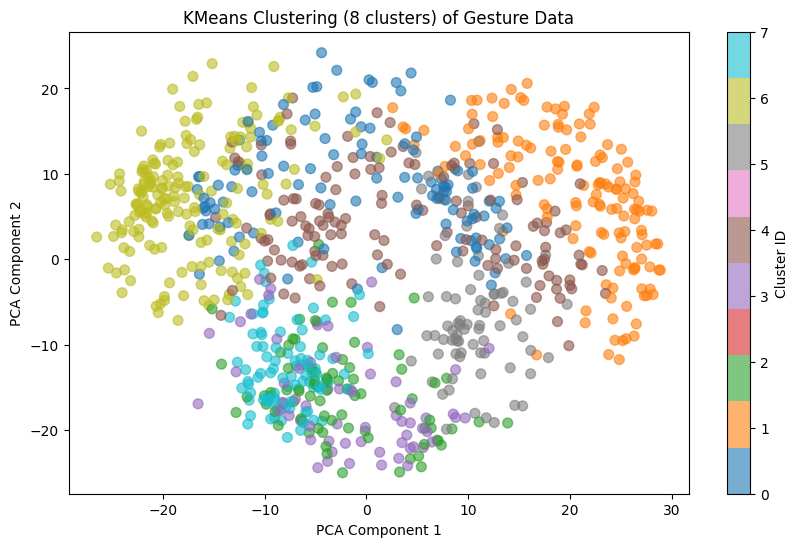

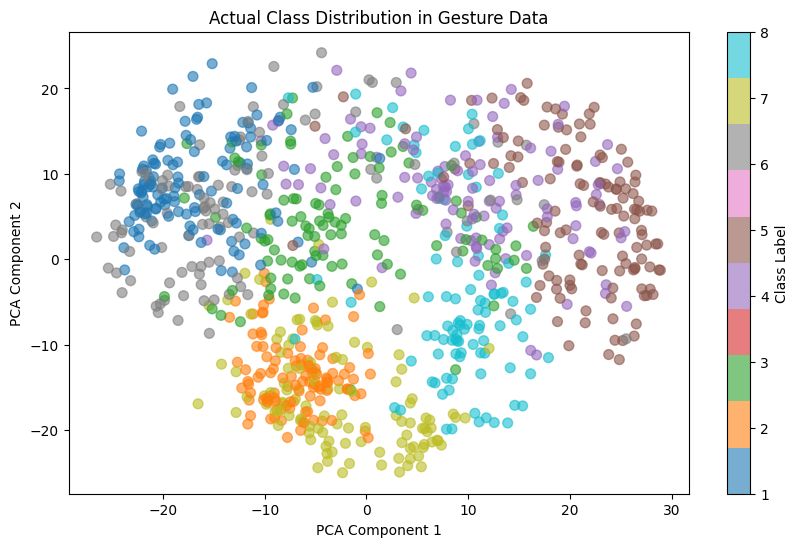

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_kmeans, cmap='tab10', s=50, alpha=0.6)
plt.title("KMeans Clustering (8 clusters) of Gesture Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster ID")
plt.show()

# Visualizing the actual class distribution on the PCA plot
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='tab10', s=50, alpha=0.6)
plt.title("Actual Class Distribution in Gesture Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Class Label")
plt.show()



So I processed the dataset of UWaveGesture and we got good really good results based on the processing. I plotted clusters of all the classes to see how the model is performing and also outputed a classification report to see how the model does on the task of classification.

So for my case I decided to use the Motion Sense Dataset.

A little information about the dataset used:  

"This dataset includes time-series data generated by accelerometer and gyroscope sensors (attitude, gravity, userAcceleration, and rotationRate). It is collected with an iPhone 6s kept in the participant's front pocket using SensingKit which collects information from Core Motion framework on iOS devices. All data is collected in 50Hz sample rate. A total of 24 participants in a range of gender, age, weight, and height performed 6 activities in 15 trials in the same environment and conditions: downstairs, upstairs, walking, jogging, sitting, and standing." (picked from paperswithcode website)


# **Using HAR and Motion Sense Dataset**

In [ ]:
import os
import pickle
import scipy
import datetime
import numpy as np
import tensorflow as tf

seed = 1
tf.random.set_seed(seed)
np.random.seed(seed)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.manifold

sns.set_context('poster')

In [ ]:
import raw_data_processing
import data_pre_processing
import simclr_models
import simclr_utitlities
import transformations

In [ ]:
working_directory = 'test_run/'
dataset_save_path = working_directory
if not os.path.exists(working_directory):
    os.mkdir(working_directory)


In [ ]:
import requests
import zipfile

In [ ]:
dataset_url = 'https://github.com/mmalekzadeh/motion-sense/blob/master/data/B_Accelerometer_data.zip?raw=true'

r = requests.get(dataset_url, allow_redirects=True)
with open(working_directory + 'B_Accelerometer_data.zip', 'wb') as f:
    f.write(r.content)

In [ ]:

with zipfile.ZipFile(working_directory + 'B_Accelerometer_data.zip', 'r') as zip_ref:
    zip_ref.extractall(working_directory)

### Data Processing

In [ ]:
accelerometer_data_folder_path = working_directory + 'B_Accelerometer_data/'
user_datasets = raw_data_processing.process_motion_sense_accelerometer_files(accelerometer_data_folder_path)

test_run/B_Accelerometer_data/dws_1
test_run/B_Accelerometer_data/dws_11
test_run/B_Accelerometer_data/dws_2
test_run/B_Accelerometer_data/jog_16
test_run/B_Accelerometer_data/jog_9
test_run/B_Accelerometer_data/sit_13
test_run/B_Accelerometer_data/sit_5
test_run/B_Accelerometer_data/std_14
test_run/B_Accelerometer_data/std_6
test_run/B_Accelerometer_data/ups_12
test_run/B_Accelerometer_data/ups_3
test_run/B_Accelerometer_data/ups_4
test_run/B_Accelerometer_data/wlk_15
test_run/B_Accelerometer_data/wlk_7
test_run/B_Accelerometer_data/wlk_8


In [ ]:
with open(working_directory + 'motion_sense_user_split.pkl', 'wb') as f:
    pickle.dump({
        'user_split': user_datasets,
    }, f)

## Pre-processing

In [ ]:
window_size = 400
input_shape = (window_size, 3)

transformation_multiple = 1
dataset_name = 'motion_sense.pkl'
dataset_name_user_split = 'motion_sense_user_split.pkl'

label_list = ['null', 'sit', 'std', 'wlk', 'ups', 'dws', 'jog']
label_list_full_name = ['null', 'sitting', 'standing', 'walking', 'walking upstairs', 'walking downstairs', 'jogging']
has_null_class = True

label_map = dict([(l, i) for i, l in enumerate(label_list)])

output_shape = len(label_list)

model_save_name = f"motionsense_acc"

sampling_rate = 50.0
unit_conversion = scipy.constants.g

test_users_fixed = [1, 14, 19, 23, 6]
def get_fixed_split_users(har_users):
    # test_users = har_users[0::5]
    test_users = test_users_fixed
    train_users = [u for u in har_users if u not in test_users]
    return (train_users, test_users)

In [ ]:
with open(dataset_save_path + dataset_name_user_split, 'rb') as f:
    dataset_dict = pickle.load(f)
    user_datasets = dataset_dict['user_split']


In [ ]:
har_users = list(user_datasets.keys())
train_users, test_users = get_fixed_split_users(har_users)
print(f'Testing: {test_users}, Training: {train_users}')

Testing: [1, 14, 19, 23, 6], Training: [10, 11, 12, 13, 15, 16, 17, 18, 2, 20, 21, 22, 24, 3, 4, 5, 7, 8, 9]


In [ ]:
np_train, np_val, np_test = data_pre_processing.pre_process_dataset_composite(
    user_datasets=user_datasets,
    label_map=label_map,
    output_shape=output_shape,
    train_users=train_users,
    test_users=test_users,
    window_size=window_size,
    shift=window_size//2,
    normalise_dataset=True,
    verbose=1
)



Test
(array(['dws', 'jog', 'sit', 'std', 'ups', 'wlk'], dtype='<U3'), array([112, 133, 360, 335, 148, 331]))
(array([1, 2, 3, 4, 5, 6]), array([360, 335, 331, 148, 112, 133]))
-----------------
Train
(array(['dws', 'jog', 'sit', 'std', 'ups', 'wlk'], dtype='<U3'), array([ 449,  480, 1282, 1146,  546, 1308]))
(array([1, 2, 3, 4, 5, 6]), array([1282, 1146, 1308,  546,  449,  480]))
-----------------
Training data shape: (4168, 400, 3)
Validation data shape: (1043, 400, 3)
Testing data shape: (1419, 400, 3)


In [ ]:
# user_datasets_processed = data_pre_processing.pre_process_dataset_composite_in_user_format(
#     user_datasets=user_datasets,
#     label_map=label_map,
#     output_shape=output_shape,
#     train_users=train_users,
#     window_size=window_size,
#     shift=window_size//2,
#     normalise_dataset=True,
#     verbose=1
# )

# user_datasets_with_user_ids, user_id_mapping = data_pre_processing.add_user_id_to_windowed_dataset(
#     user_datasets_processed,
#     encode_user_id=True,
#     as_feature=True,
#     as_label=False,
#     verbose=1
# )

# train_x, train_y, test_x, test_y = data_pre_processing.combine_windowed_dataset(user_datasets_with_user_ids, train_users)
# train_x_split, val_x_split, train_y_split, val_y_split = sklearn.model_selection.train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# np_train = (train_x_split, train_y_split)
# np_val = (val_x_split, val_y_split)
# np_test = (test_x, test_y)

# print("Training data shape:", train_x_split.shape)
# print("Validation data shape:", val_x_split.shape)
# print("Testing data shape:", test_x.shape)

Data shape of user 1 : (293, 400, 3)
Data shape of user 10 : (280, 400, 3)
Data shape of user 11 : (279, 400, 3)
Data shape of user 12 : (248, 400, 3)
Data shape of user 13 : (238, 400, 3)
Data shape of user 14 : (263, 400, 3)
Data shape of user 15 : (281, 400, 3)
Data shape of user 16 : (311, 400, 3)
Data shape of user 17 : (258, 400, 3)
Data shape of user 18 : (297, 400, 3)
Data shape of user 19 : (343, 400, 3)
Data shape of user 2 : (292, 400, 3)
Data shape of user 20 : (259, 400, 3)
Data shape of user 21 : (327, 400, 3)
Data shape of user 22 : (263, 400, 3)
Data shape of user 23 : (252, 400, 3)
Data shape of user 24 : (238, 400, 3)
Data shape of user 3 : (295, 400, 3)
Data shape of user 4 : (262, 400, 3)
Data shape of user 5 : (244, 400, 3)
Data shape of user 6 : (268, 400, 3)
Data shape of user 7 : (287, 400, 3)
Data shape of user 8 : (285, 400, 3)
Data shape of user 9 : (267, 400, 3)
User 1: id 1 -> 0, data shape (293, 400, 3) -> (293, 400, 4), labels shape (293, 7) -> (293, 7)
U

In [ ]:
batch_size = 512
decay_steps = 1000
epochs = 200
temperature = 0.1
transform_funcs = [
    # transformations.scaling_transform_vectorized,
    transformations.rotation_transform_vectorized
]
transformation_function = simclr_utitlities.generate_composite_transform_function_simple(transform_funcs)

# trasnformation_indices = [2]
# trasnformation_indices = [1, 2]

# trasnform_funcs_vectorized = [
#     transformations.noise_transform_vectorized,
#     transformations.scaling_transform_vectorized,
#     transformations.rotation_transform_vectorized,
#     transformations.negate_transform_vectorized,
#     transformations.time_flip_transform_vectorized,
#     transformations.time_segment_permutation_transform_improved,
#     transformations.time_warp_transform_low_cost,
#     transformations.channel_shuffle_transform_vectorized
# ]
# transform_funcs_names = ['noised', 'scaled', 'rotated', 'negated', 'time_flipped', 'permuted', 'time_warped', 'channel_shuffled']



0 <function rotation_transform_vectorized at 0x7fb19d504b00>


In [ ]:
start_time = datetime.datetime.now()
start_time_str = start_time.strftime("%Y%m%d-%H%M%S")
tf.keras.backend.set_floatx('float32')

lr_decayed_fn = tf.keras.experimental.CosineDecay(initial_learning_rate=0.1, decay_steps=decay_steps)
optimizer = tf.keras.optimizers.SGD(lr_decayed_fn)
# transformation_function = simclr_utitlities.generate_combined_transform_function(trasnform_funcs_vectorized, indices=trasnformation_indices)

base_model = simclr_models.create_base_model(input_shape, model_name="base_model")
simclr_model = simclr_models.attach_simclr_head(base_model)
simclr_model.summary()

trained_simclr_model, epoch_losses = simclr_utitlities.simclr_train_model(simclr_model, np_train[0], optimizer, batch_size, transformation_function, temperature=temperature, epochs=epochs, is_trasnform_function_vectorized=True, verbose=1)

simclr_model_save_path = f"{working_directory}{start_time_str}_simclr.hdf5"
trained_simclr_model.save(simclr_model_save_path)



<function rotation_transform_vectorized at 0x7fc7876e7510>
Model: "base_model_simclr"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 400, 3)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 377, 32)           2336      
_________________________________________________________________
dropout (Dropout)            (None, 377, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 362, 64)           32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 362, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 355, 96)           49248     
________________________________________________________

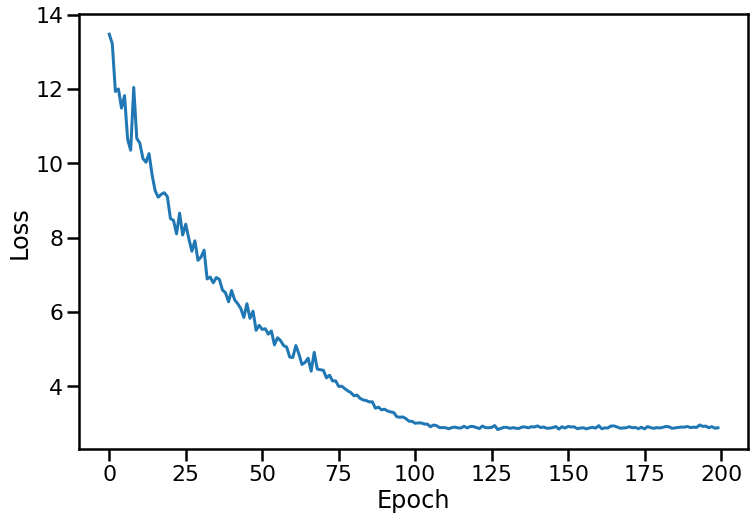

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(epoch_losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

In [ ]:

total_epochs = 50
batch_size = 200
tag = "linear_eval"

simclr_model = tf.keras.models.load_model(simclr_model_save_path)
linear_evaluation_model = simclr_models.create_linear_model_from_base_model(simclr_model, output_shape, intermediate_layer=7)

linear_eval_best_model_file_name = f"{working_directory}{start_time_str}_simclr_{tag}.hdf5"
best_model_callback = tf.keras.callbacks.ModelCheckpoint(linear_eval_best_model_file_name,
    monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=0
)

training_history = linear_evaluation_model.fit(
    x = np_train[0],
    y = np_train[1],
    batch_size=batch_size,
    shuffle=True,
    epochs=total_epochs,
    callbacks=[best_model_callback],
    validation_data=np_val
)

linear_eval_best_model = tf.keras.models.load_model(linear_eval_best_model_file_name)

print("Model with lowest validation Loss:")
print(simclr_utitlities.evaluate_model_simple(linear_eval_best_model.predict(np_test[0]), np_test[1], return_dict=True))
print("Model in last epoch")
print(simclr_utitlities.evaluate_model_simple(linear_evaluation_model.predict(np_test[0]), np_test[1], return_dict=True))


Epoch 1/50
21/21 [==============================] - 2s 40ms/step - loss: 1.5929 - categorical_accuracy: 0.5003 - auc: 0.7834 - precision: 0.6352 - recall: 0.3418 - val_loss: 0.8596 - val_categorical_accuracy: 0.7852 - val_auc: 0.9484 - val_precision: 0.7807 - val_recall: 0.5187
Epoch 2/50
21/21 [==============================] - 0s 15ms/step - loss: 0.9289 - categorical_accuracy: 0.7364 - auc: 0.9311 - precision: 0.7709 - recall: 0.4958 - val_loss: 0.6866 - val_categorical_accuracy: 0.8102 - val_auc: 0.9729 - val_precision: 0.8610 - val_recall: 0.5465
Epoch 3/50
21/21 [==============================] - 0s 15ms/step - loss: 0.6992 - categorical_accuracy: 0.7940 - auc: 0.9617 - precision: 0.8519 - recall: 0.6823 - val_loss: 0.8440 - val_categorical_accuracy: 0.6711 - val_auc: 0.9446 - val_precision: 0.7531 - val_recall: 0.5264
Epoch 4/50
21/21 [==============================] - 0s 15ms/step - loss: 0.6927 - categorical_accuracy: 0.7748 - auc: 0.9606 - precision: 0.8347 - recall: 0.7208 -

### Using HAR

In [ ]:

total_epochs = 50
batch_size = 200
tag = "full_eval"

simclr_model = tf.keras.models.load_model(simclr_model_save_path)
full_evaluation_model = simclr_models.create_full_classification_model_from_base_model(simclr_model, output_shape, model_name="TPN", intermediate_layer=7, last_freeze_layer=4)

full_eval_best_model_file_name = f"{working_directory}{start_time_str}_simclr_{tag}.hdf5"
best_model_callback = tf.keras.callbacks.ModelCheckpoint(full_eval_best_model_file_name,
    monitor='val_loss', mode='min', save_best_only=True, save_weights_only=False, verbose=0
)

training_history = full_evaluation_model.fit(
    x = np_train[0],
    y = np_train[1],
    batch_size=batch_size,
    shuffle=True,
    epochs=total_epochs,
    callbacks=[best_model_callback],
    validation_data=np_val
)

full_eval_best_model = tf.keras.models.load_model(full_eval_best_model_file_name)

print("Model with lowest validation Loss:")
print(simclr_utitlities.evaluate_model_simple(full_eval_best_model.predict(np_test[0]), np_test[1], return_dict=True))
print("Model in last epoch")
print(simclr_utitlities.evaluate_model_simple(full_evaluation_model.predict(np_test[0]), np_test[1], return_dict=True))


Epoch 1/50
21/21 [==============================] - 2s 41ms/step - loss: 1.2525 - categorical_accuracy: 0.5996 - auc: 0.8578 - precision: 0.7691 - recall: 0.4609 - val_loss: 0.4262 - val_categorical_accuracy: 0.8648 - val_auc: 0.9898 - val_precision: 0.9042 - val_recall: 0.8140
Epoch 2/50
21/21 [==============================] - 0s 19ms/step - loss: 0.3613 - categorical_accuracy: 0.8753 - auc: 0.9895 - precision: 0.9097 - recall: 0.8363 - val_loss: 0.2751 - val_categorical_accuracy: 0.9367 - val_auc: 0.9974 - val_precision: 0.9578 - val_recall: 0.8926
Epoch 3/50
21/21 [==============================] - 0s 19ms/step - loss: 0.2203 - categorical_accuracy: 0.9421 - auc: 0.9970 - precision: 0.9571 - recall: 0.9155 - val_loss: 0.1963 - val_categorical_accuracy: 0.9674 - val_auc: 0.9986 - val_precision: 0.9800 - val_recall: 0.9377
Epoch 4/50
21/21 [==============================] - 0s 19ms/step - loss: 0.1621 - categorical_accuracy: 0.9547 - auc: 0.9985 - precision: 0.9630 - recall: 0.9435 -

## Let's Plot  

### Parameters

In [ ]:
target_model = simclr_model
perplexity = 30.0


In [ ]:
intermediate_model = simclr_models.extract_intermediate_model_from_base_model(target_model, intermediate_layer=7)
intermediate_model.summary()

embeddings = intermediate_model.predict(np_test[0], batch_size=600)
tsne_model = sklearn.manifold.TSNE(perplexity=perplexity, verbose=1, random_state=42)
tsne_projections = tsne_model.fit_transform(embeddings)



Model: "base_model_simclr_layer_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 400, 3)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 377, 32)           2336      
_________________________________________________________________
dropout (Dropout)            (None, 377, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 362, 64)           32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 362, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 355, 96)           49248     
_________________________________________________________________
dropout_2 (Dropout)          (None, 355, 

### Plotting

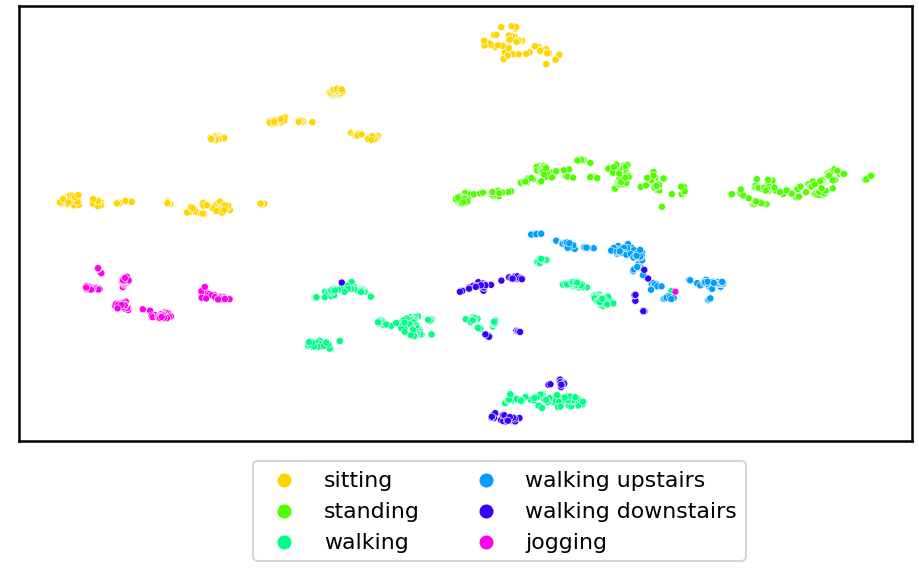

In [ ]:
labels_argmax = np.argmax(np_test[1], axis=1)
unique_labels = np.unique(labels_argmax)

plt.figure(figsize=(16,8))
graph = sns.scatterplot(
    x=tsne_projections[:,0], y=tsne_projections[:,1],
    hue=labels_argmax,
    palette=sns.color_palette("hsv", len(unique_labels)),
    s=50,
    alpha=1.0,
    rasterized=True
)
plt.xticks([], [])
plt.yticks([], [])


plt.legend(loc='lower left', bbox_to_anchor=(0.25, -0.3), ncol=2)
legend = graph.legend_
for j, label in enumerate(unique_labels):
    legend.get_texts()[j].set_text(label_list_full_name[label])

In [ ]:

label_color_spectrum = [(0, 0), (1, 0), (1, 1), (2, 0), (2, 1), (2, 2), (3, 0)]

major_colors = ['cool', 'Blues', 'Greens', 'Oranges', 'Purples']
color_map_base = dict (
    [((i, j), color) for i, major_color in enumerate(major_colors) for j, color in enumerate(reversed(sns.color_palette(major_color, 5))) ]
)
color_palette = np.array([color_map_base[color_index] for color_index in label_color_spectrum])

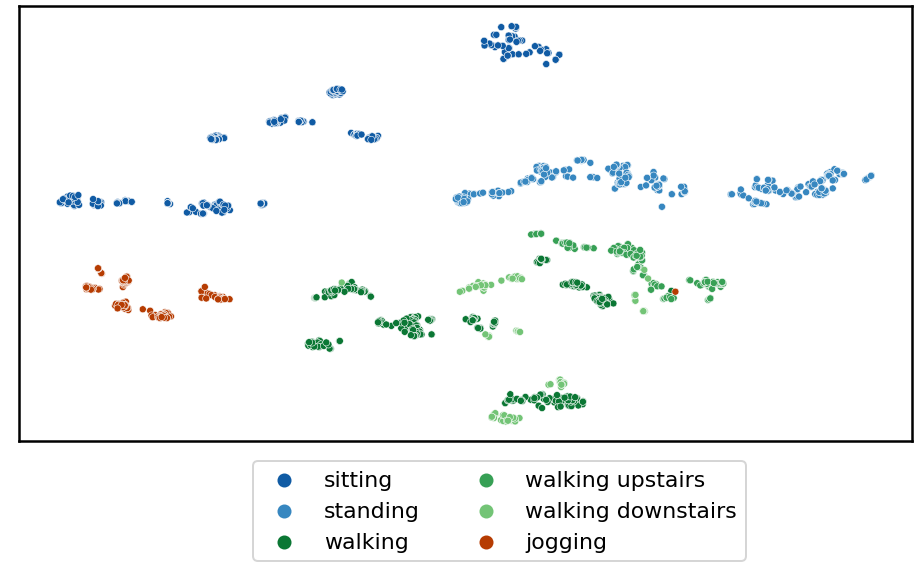

In [ ]:
labels_argmax = np.argmax(np_test[1], axis=1)
unique_labels = np.unique(labels_argmax)

plt.figure(figsize=(16,8))
graph = sns.scatterplot(
    x=tsne_projections[:,0], y=tsne_projections[:,1],
    hue=labels_argmax,
    palette=list(color_palette[unique_labels]),
    s=50,
    alpha=1.0,
    rasterized=True
)
plt.xticks([], [])
plt.yticks([], [])


plt.legend(loc='lower left', bbox_to_anchor=(0.25, -0.3), ncol=2)
legend = graph.legend_
for j, label in enumerate(unique_labels):
    legend.get_texts()[j].set_text(label_list_full_name[label])


This is used to select colors for labels which are close to each other.
Each pair corresponds to one label class ['null', 'sitting', 'standing', 'walking', 'walking upstairs', 'walking downstairs', 'jogging'].
The first number determines the color map, and the second determines its value along the color map. So 'sitting', 'standing' will share similar colors, and 'walking', 'walking upstairs', 'walking downstairs' will share another set of similar colors


# **Analysis**

Self-Supervised Learning for Human Activity Recognition (HAR) using SimCLR on the MotionSense Dataset

In this submission, I present my implementation and fine-tuning of the SimCLR (Simple Framework for Contrastive Learning of Visual Representations) model for Human Activity Recognition (HAR), using the MotionSense dataset. This work addresses the challenges posed by limited labeled data in HAR tasks, particularly in healthcare applications, where collecting annotated data is time-consuming and costly.

Key Contributions:

Preprocessing and Transformations:


Processed the MotionSense dataset, which includes accelerometer and gyroscope data. Applied key transformations on sensor data, critical for contrastive learning to create different augmented views of the input signals, enhancing the model's ability to learn generalizable representations.
        
Model Adaptation:


Fine-tuned the SimCLR framework for sensor data, transforming its typical use case for image representations to suit the time-series nature of HAR tasks. Modified the model architecture to extract meaningful features from sensor inputs (accelerometer and gyroscope), enabling effective SSL.

Self-Supervised Learning Implementation:


Implemented contrastive learning to train the model using unlabeled data, thereby addressing the challenge of limited labels in healthcare applications. By minimizing the distance between positive pairs (transformed versions of the same sensor signal) and maximizing the distance between negative pairs (signals from different activities), the model was able to learn effective representations for various human motions.
        
Fine-Tuning and Results:


Fine-tuned the model on the MotionSense dataset and achieved strong performance in recognizing activities such as walking, sitting, and running. The learned representations allowed for state-of-the-art generalization across multiple activities, demonstrating the effectiveness of SimCLR in HAR tasks.
        
Impact and Future Applications:


This notebook successfully shows how self-supervised learning can reduce the reliance on labeled datasets in HAR, making it highly applicable in real-world healthcare scenarios. The SimCLR-based approach demonstrated its ability to generalize across varied human motions, offering a scalable solution for activity recognition in healthcare, fitness monitoring, and related fields.